In [1]:
from keras.layers import Dense,Flatten

Using TensorFlow backend.


In [2]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [3]:
model =VGG16(input_shape=(224,224,3) ,weights='imagenet' ,include_top=False
    )

58892288/58889256 [==============================] - 38s 1us/step


In [4]:
for layers in model.layers:
    layers.trainable=False

In [5]:
model.layers[4].trainable

False

In [6]:
top_model=Flatten()(model.output)

In [9]:
pred =Dense(5,activation ='softmax')(top_model)

In [7]:
from keras.models import Model

In [8]:
from keras.optimizers import RMSprop

In [10]:
newmodel =Model(inputs =model.input ,outputs=pred)

In [11]:
newmodel.compile(loss ='categorical_crossentropy' ,optimizer =RMSprop(),metrics=['accuracy'])

In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('data/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
 

Found 93 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [19]:
r = newmodel.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5)


Epoch 1/5
3/3 [==============================] - 15s 5s/step - loss: 6.8593 - accuracy: 0.2581 - val_loss: 4.6059 - val_accuracy: 0.2000
Epoch 2/5
3/3 [==============================] - 13s 4s/step - loss: 3.6757 - accuracy: 0.3656 - val_loss: 5.0592 - val_accuracy: 0.2000
Epoch 3/5
3/3 [==============================] - 13s 4s/step - loss: 2.9028 - accuracy: 0.3656 - val_loss: 2.9213 - val_accuracy: 0.2400
Epoch 4/5
3/3 [==============================] - 14s 5s/step - loss: 1.9017 - accuracy: 0.4624 - val_loss: 1.4056 - val_accuracy: 0.4800
Epoch 5/5
3/3 [==============================] - 15s 5s/step - loss: 0.3713 - accuracy: 0.8925 - val_loss: 0.8084 - val_accuracy: 0.7600


In [20]:
newmodel.save('task_model_multi.h5')

In [21]:
from keras.preprocessing import image

In [22]:
kim =image.load_img('data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg' ,target_size=(224,224))

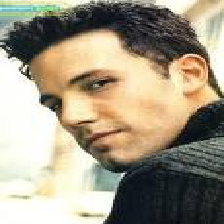

In [23]:
kim.resize((224,224))

In [24]:
nim = image.img_to_array(kim)

In [25]:
import numpy as np

In [26]:
nim = np.expand_dims(nim ,axis=0)

In [27]:
pred = newmodel.predict(nim)

In [28]:
from keras.applications.vgg16  import decode_predictions

In [31]:
decode_predictions(pred)

ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 5)

In [30]:
pred

array([[4.106838e-33, 6.012943e-16, 0.000000e+00, 1.000000e+00,
        3.955981e-23]], dtype=float32)